# 머신러닝 모델을 제품으로 만들어보자 : MLOps 기초[프로젝트]

# 프로젝트: 이제까지 만들었던 모델을 튜닝하고 배포하기!

KerasTuner 설치하기

In [1]:
# KerasTuner 설치하기
!pip install keras-tuner

Tuner 설치를 완료 하였으니 필요한 라이브러리 임포트 하겠습니다.

In [2]:
# 필요 라이브러리 임포트
import tensorflow as tf
import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
import os

우리가 이번에 사용할 데이터셋은 CIFAR-10입니다. keras에 내장되어 있는 datasets으로 불러오겠습니다!

In [3]:
# MNIST datasets 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train.shape

(50000, 32, 32, 3)

scikit-learn에 내장되어 있는 train_test_split으로 train data와 validation data를 나누어줍니다.

In [4]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
print(X_train.shape)
print(X_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# DeepTuner 불러오기 (영빈 퍼실님 코드 참조)
class DeepTuner(kt.Tuner):
    def run_trial(self, trial, X, y, validation_data, **fit_kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(X, y, batch_size=trial.hyperparameters.Choice(
            'batch_size', [16, 32]), **fit_kwargs)


        X_val, y_val = validation_data
        eval_scores = model.evaluate(X_val, y_val)
        return {name: value for name, value in zip(
            model.metrics_names,
            eval_scores)}

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        AveragePooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(units=256, activation='relu'),
        Dropout(rate=0.3),
        Dense(units=10, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

In [32]:
my_keras_tuner = DeepTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        objective=kt.Objective('accuracy', 'max'),
        max_trials=10,
        seed=42),
    hypermodel=build_model,
    overwrite=True,
    project_name='my_keras_tuner')

# 해당 모델 학습시간은 약 10분정도 걸립니다!
my_keras_tuner.search(
    X_train, y_train, validation_data=(X_val, y_val), epochs=3)

Trial 1 Complete [00h 00m 00s]

Best accuracy So Far: None
Total elapsed time: 00h 00m 00s


In [27]:
# CIFAR-10 클래스
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

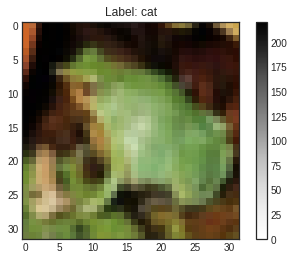

In [30]:
# 잘못 분류된 이미지 확인
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_test[2405])
plt.title('Label: {}'.format(CIFAR10_CLASSES[y_test[2405][0]]))
plt.colorbar()
plt.show()

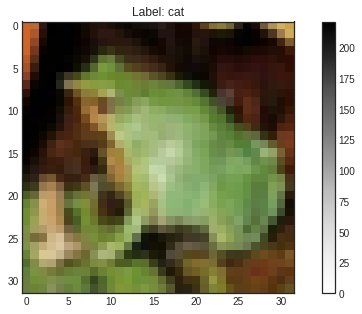

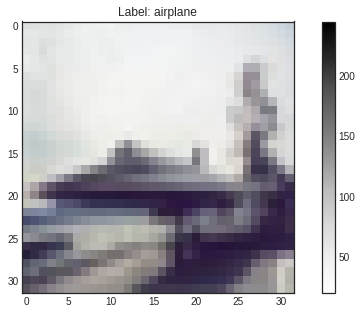

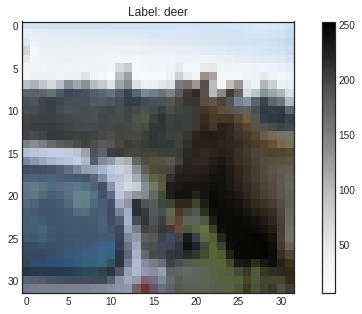

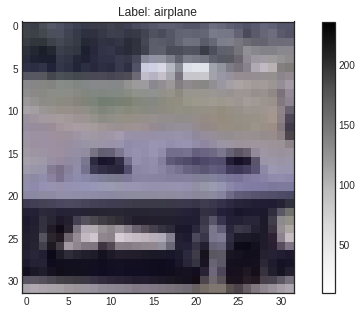

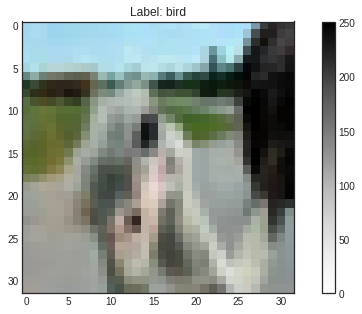

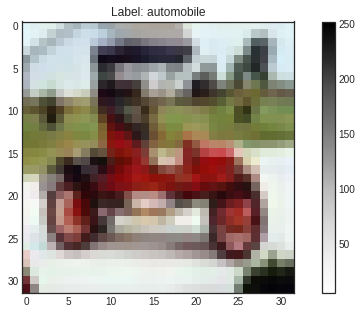

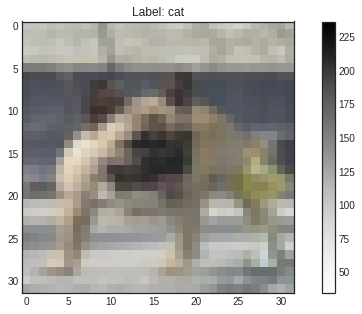

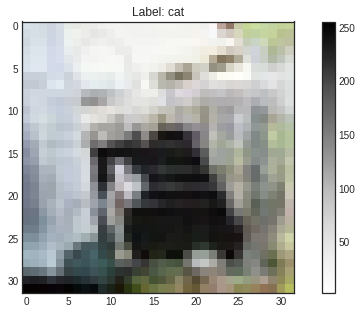

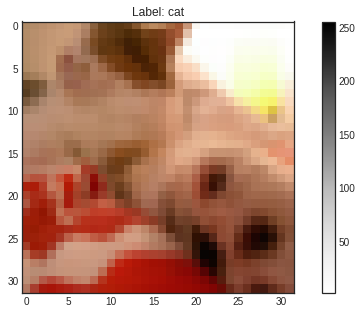

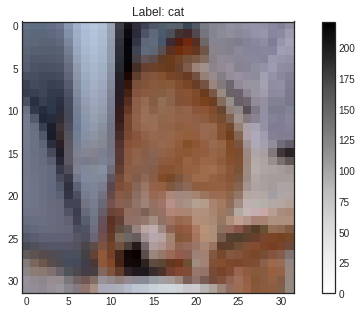

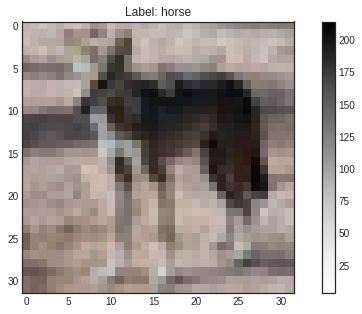

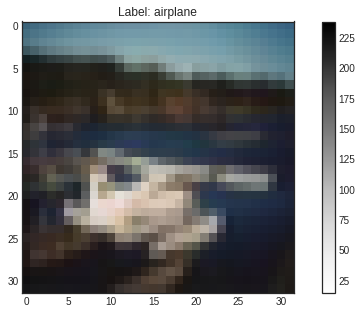

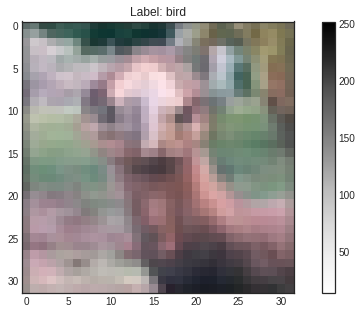

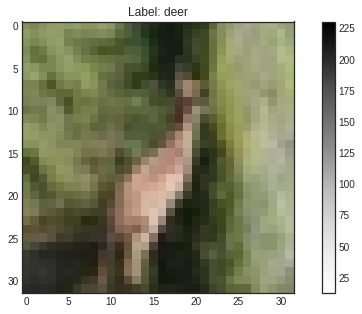

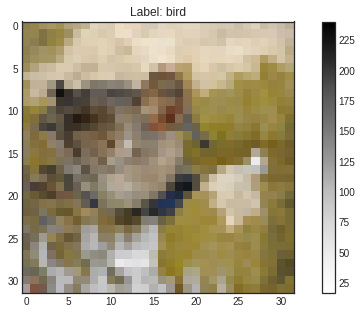

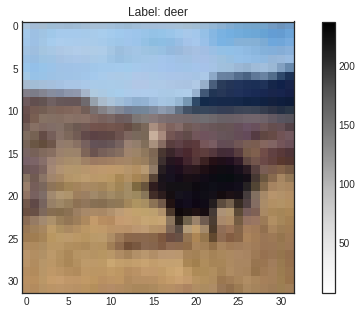

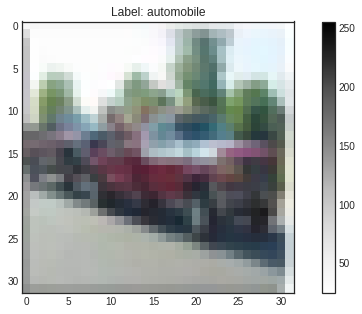

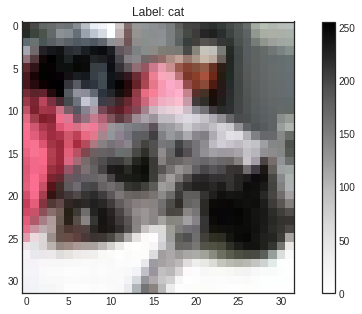

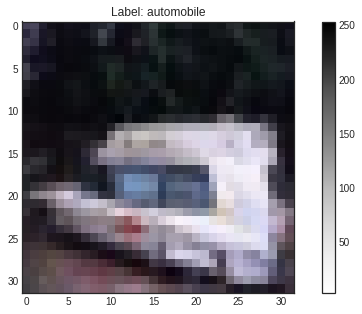

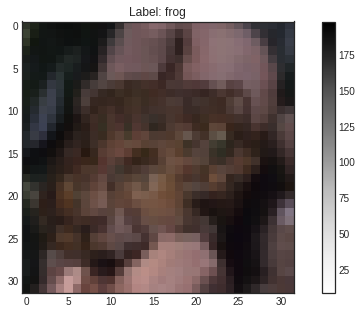

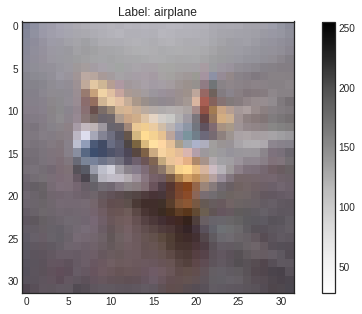

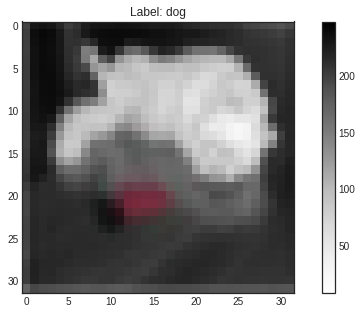

In [40]:
error_label = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]


plt.style.use('seaborn-white')

for i in error_label:
    plt.figure(figsize = (10, 5))
    plt.imshow(x_test[i])
    plt.title('Label: {}'.format(CIFAR10_CLASSES[y_test[i][0]]))
    plt.colorbar()
    plt.show()

## 회고

Exploration-project14가 끝났다.    
Exploration13과 이때까지 배운 노드들을 참고하여 작업해보려고 했지만... 작업을 마무리 하지 못했다.   
추후에 더 작업을 해야겠다.